In [1]:
#设置ast_node_interactivity = "all"使得可以同时输出多条语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#导入需要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#导入数据
df=pd.read_csv(r'E:\python\data\titanic\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


针对每一个字段做一个简单的解释： PassengerId: 乘客ID；
    
Survived: 生存情况，0代表不幸遇难，1代表存活；
    
Pclass: 仓位等级，1为一等舱，2为二等舱，3为三等舱；
    
Name: 乘客姓名；
    
Sex: 性别；
    
Age: 年龄；
    
SibSp: 乘客在船上的兄妹姐妹数/配偶数（即同代直系亲属数）
    ；
Parch: 乘客在船上的父母数/子女数（即不同代直系亲属数）；
    
Ticket: 船票编号；
    
Fare: 船票价格；
    
Cabin: 客舱号；
    
Embarked: 登船港口（S: Southampton; C: Cherbourg Q: Queenstown）

先看下数据的大小和基本信息

In [2]:
df.shape
df.info()

(891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


数据一共有891行，12列，进一步查看描述性统计

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 整体情况
看一下生存情况，即本次沉船事件中，有多少人生存下来

In [4]:
Survived=df['Survived'].value_counts()
Survived
#计算生存占比
survive_prod=Survived/Survived.sum()
survive_prod

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

可以看到，超过60%的人遇难，我们将其绘制成饼图

([<matplotlib.patches.Wedge at 0xa1f8e48>,
 [Text(-1.02756,-0.392575,'遇难'), Text(1.02756,0.392575,'存活')],
 [Text(-0.560489,-0.214132,'61.6%'), Text(0.560489,0.214132,'38.4%')])

Text(0.5,1,'存活占比')

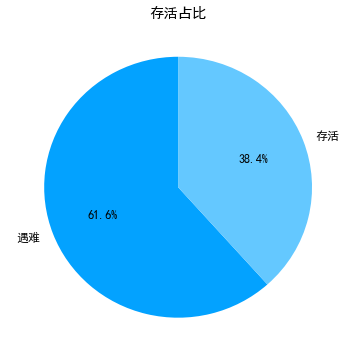

In [5]:
plt.rc('font',family='SimHei',size=12)#正常显示中文，并设置字体大小
fig=plt.figure(figsize=(6,6))
ax1=fig.add_subplot(1,1,1)
labels=['遇难','存活']
colors=['#03A2FF','#64C8FF']
ax1.pie(survive_prod,labels=labels,colors=colors,startangle=90,autopct='%1.1f%%')
ax1.set_title('存活占比')

## 性别分布

In [6]:
#按生存情况和性别分组
sex_df=df.groupby(['Survived','Sex']).size()
sex_df

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [7]:
#进一步将数据转化成DataFrame
sex_df=sex_df.unstack('Sex')
sex_df=sex_df.rename(index={0:'遇难',1:'存活'})
sex_df

Sex,female,male
Survived,,
遇难,81,468
存活,233,109


In [8]:
sex_prod=sex_df/sex_df.sum()
sex_prod

Sex,female,male
Survived,,
遇难,0.257962,0.811092
存活,0.742038,0.188908


从统计结果看到女性81人遇难，占比约26%，男性468人遇难，占比约81%

<Container object of 2 artists>

<Container object of 2 artists>

[Text(0,0,'female'), Text(0,0,'male')]

[]

Text(0.5,1,'不同性别存活分布')

Text(0,0.128981,'25.8%')

Text(0,0.628981,'74.2%')

Text(1,0.405546,'81.1%')

Text(1,0.905546,'18.9%')

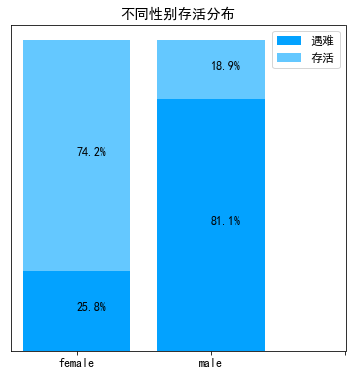

In [11]:
plt.rc('font',family='SimHei',size=12)#正常显示中文，并设置字体大小
fig=plt.figure(figsize=(6,6))#设置画布大小
ax1=fig.add_subplot(1,1,1)#添加子图
x=range(2)
a=sex_prod.loc['遇难',:]
b=sex_prod.loc['存活',:]
ax1.bar(x,a,label='遇难',color='#03A2FF')
ax1.bar(x,b,bottom=a,label='存活',color='#64C8FF')#通过bottom参数绘制堆积柱状图
ax1.set_xticks(range(3))#设置x轴刻度，之所以设置为3，是为了让图例显示在空白处
ax1.set_xticklabels(['female','male'])#设置x轴刻度标签名称
ax1.set_yticks([])
ax1.legend(['遇难','存活'],loc='upper right')#设置图例名称及位置（upper/center/lower,left/center/right）
ax1.set_title('不同性别存活分布')#设置标题
#添加数据标签
for x,y,z in zip(range(2),a,b):
    ax1.text(x,y/2,'{:.1%}'.format(y))
    ax1.text(x,y+z/2,'{:.1%}'.format(z))

## 年龄分布

In [12]:
#提取需要的数据
age_df=df.loc[:,['Survived','Age']]
age_df.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [13]:
#对年龄分组,从前面的描述性统计可以看到，年龄的最小值是0.42岁，最大值是80岁
bins=[0,20,40,60,100]
labels=['20岁及以下','21-40岁','41-60岁','60岁以上']
age_df['levels']=pd.cut(age_df['Age'],bins=bins,labels=labels)
age_df.head()

,Survived,Age,levels
0,0,22.0,21-40岁
1,1,38.0,21-40岁
2,1,26.0,21-40岁
3,1,35.0,21-40岁
4,0,35.0,21-40岁


In [14]:
#遇难/存活人员的平均年龄
age_mean=age_df.groupby('Survived')['Age'].mean()
age_mean

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [15]:
#遇难/存活人员年龄分布
age_level=age_df.groupby(['Survived','levels']).size()#不统计na值
age_level

Survived  levels
0         20岁及以下     97
          21-40岁    232
          41-60岁     78
          60岁以上      17
1         20岁及以下     82
          21-40岁    153
          41-60岁     50
          60岁以上       5
dtype: int64

In [16]:
#通过unstack方法转换成DataFrame
age_level=age_level.unstack()
age_level=age_level.rename(index={0:'遇难',1:'存活'})
age_level

levels,20岁及以下,21-40岁,41-60岁,60岁以上
Survived,,,,
遇难,97,232,78,17
存活,82,153,50,5


In [17]:
#进一步计算占比
age_prod=age_level/age_level.sum()
age_prod

levels,20岁及以下,21-40岁,41-60岁,60岁以上
Survived,,,,
遇难,0.541899,0.602597,0.609375,0.772727
存活,0.458101,0.397403,0.390625,0.227273


可以看到，随着年龄的增加，存活比例逐渐降低

<Container object of 4 artists>

<Container object of 4 artists>

[Text(0,0,'20岁及以下'), Text(0,0,'21-40岁'), Text(0,0,'41-60岁'), Text(0,0,'60岁以上')]

[]

Text(0.5,1,'不同年龄存活分布')

Text(-0.1,0.27095,'54.2%')

Text(-0.1,0.77095,'45.8%')

Text(0.9,0.301299,'60.3%')

Text(0.9,0.801299,'39.7%')

Text(1.9,0.304688,'60.9%')

Text(1.9,0.804688,'39.1%')

Text(2.9,0.386364,'77.3%')

Text(2.9,0.886364,'22.7%')

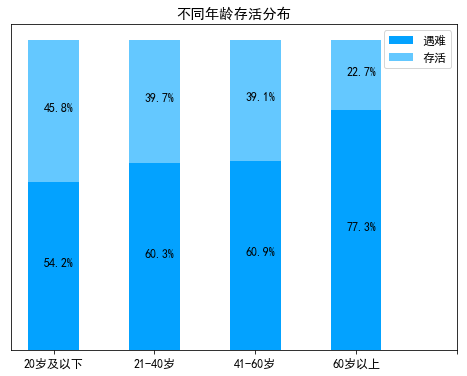

In [18]:
plt.rc('font',family='SimHei',size=12)#正常显示中文，并设置字体大小
fig=plt.figure(figsize=(8,6))#设置画布大小
ax1=fig.add_subplot(1,1,1)#添加子图
x=range(4)
a=age_prod.loc['遇难',:]
b=age_prod.loc['存活',:]
ax1.bar(x,a,label='遇难',width=0.5,color='#03A2FF')
ax1.bar(x,b,bottom=a,label='存活',width=0.5,color='#64C8FF')#通过bottom参数绘制堆积柱状图
ax1.set_xticks(range(5))#设置x轴刻度，之所以设置为3，是为了让图例显示在空白处
ax1.set_xticklabels(['20岁及以下','21-40岁','41-60岁','60岁以上'])#设置x轴刻度标签名称
ax1.set_yticks([])#将y轴刻度设为空
ax1.legend(['遇难','存活'],loc='upper right')#设置图例名称及位置（upper/center/lower,left/center/right）
ax1.set_title('不同年龄存活分布')#设置标题
#添加数据标签
for x,y,z in zip(range(4),a,b):
    ax1.text(x-0.1,y/2,'{:.1%}'.format(y))
    ax1.text(x-0.1,y+z/2,'{:.1%}'.format(z))

## 家庭人数

SibSp: 乘客在船上的兄妹姐妹数/配偶数（即同代直系亲属数） ； Parch: 乘客在船上的父母数/子女数（即不同代直系亲属数）；我们将SibSp与Parch加起来，再加上乘客自己，得到家庭人数

In [19]:
df['familysize']=df['SibSp']+df['Parch']+1
family_df=df.loc[:,['Survived','familysize']]
family_df.head()

,Survived,familysize
0,0,2
1,1,2
2,1,1
3,1,2
4,0,1


定义familysize=1:single，familysize>=2&familysize<=3:small，familysize>=4:large

In [20]:
bins=[0,1,3,12]
labels=['single','small','large']
family_df['family_level']=pd.cut(family_df['familysize'],bins=bins,labels=labels)#按左开右闭进行切割
family_df.head()

,Survived,familysize,family_level
0,0,2,small
1,1,2,small
2,1,1,single
3,1,2,small
4,0,1,single


In [21]:
family_df=family_df.groupby(['Survived','family_level']).size()
family_df

Survived  family_level
0         single          374
          small           115
          large            60
1         single          163
          small           148
          large            31
dtype: int64

In [22]:
family_df=family_df.unstack()
family_df=family_df.rename(index={0:'遇难',1:'存活'})
family_df

family_level,single,small,large
Survived,,,
遇难,374,115,60
存活,163,148,31


In [23]:
family_prod=family_df/family_df.sum()
family_prod

family_level,single,small,large
Survived,,,
遇难,0.696462,0.437262,0.659341
存活,0.303538,0.562738,0.340659


<Container object of 3 artists>

<Container object of 3 artists>

[Text(0,0,'single'), Text(0,0,'small'), Text(0,0,'large')]

[]

Text(0.5,1,'不同家庭规模存活分布')

Text(0.348231,0,'69.6%')

Text(0.848231,0,'30.4%')

Text(0.218631,1,'43.7%')

Text(0.718631,1,'56.3%')

Text(0.32967,2,'65.9%')

Text(0.82967,2,'34.1%')

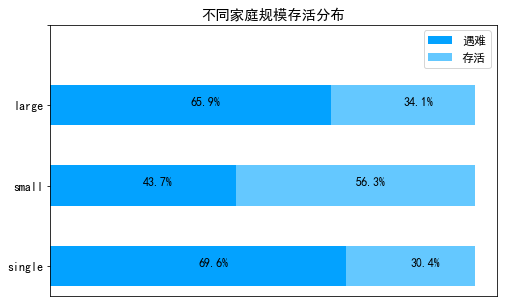

In [24]:
plt.rc('font',family='SimHei',size=12)#正常显示中文，并设置字体大小
fig=plt.figure(figsize=(8,5))#设置画布大小
ax1=fig.add_subplot(1,1,1)#添加子图
y=range(3)
a=family_prod.loc['遇难',:]
b=family_prod.loc['存活',:]
ax1.barh(y,a,label='遇难',height=0.5,color='#03A2FF')
ax1.barh(y,b,left=a,label='存活',height=0.5,color='#64C8FF')#通过left参数绘制堆积柱状图
ax1.set_yticks(range(4))#设置y轴刻度，之所以设置为4，是为了让图例显示在空白处
ax1.set_yticklabels(['single','small','large'])#设置y轴刻度标签名称
ax1.set_xticks([])#将x轴刻度设置为空
ax1.legend(['遇难','存活'],loc='upper right')#设置图例名称及位置（upper/center/lower,left/center/right）
ax1.set_title('不同家庭规模存活分布')#设置标题
#添加数据标签
for x,y,z in zip(range(4),a,b):
    ax1.text(y/2,x,'{:.1%}'.format(y))
    ax1.text(y+z/2,x,'{:.1%}'.format(z))

可以看到，穿上只有一个人的存活率最高，近70%

## 仓位等级

In [25]:
pclass_df=df.loc[:,['Survived','Pclass']]
pclass_df.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [26]:
pclass_df=pclass_df.groupby(['Survived','Pclass']).size()
pclass_df

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [27]:
pclass_df=pclass_df.unstack()
pclass_df=pclass_df.rename(index={0:'遇难',1:'存活'},columns={1:'一等舱',2:'二等舱',3:'三等舱'})
pclass_df

Pclass,一等舱,二等舱,三等舱
Survived,,,
遇难,80,97,372
存活,136,87,119


In [28]:
pcalss_prod=pclass_df/pclass_df.sum()
pcalss_prod

Pclass,一等舱,二等舱,三等舱
Survived,,,
遇难,0.37037,0.527174,0.757637
存活,0.62963,0.472826,0.242363


<Container object of 3 artists>

<Container object of 3 artists>

[Text(0,0,'一等舱'), Text(0,0,'二等舱'), Text(0,0,'三等舱')]

[]

Text(0.5,1,'不同仓位等级存活分布')

Text(0.185185,0,'37.0%')

Text(0.685185,0,'63.0%')

Text(0.263587,1,'52.7%')

Text(0.763587,1,'47.3%')

Text(0.378819,2,'75.8%')

Text(0.878819,2,'24.2%')

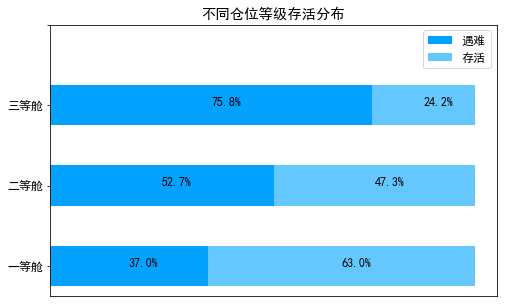

In [29]:
plt.rc('font',family='SimHei',size=12)#正常显示中文，并设置字体大小
fig=plt.figure(figsize=(8,5))#设置画布大小
ax1=fig.add_subplot(1,1,1)#添加子图
y=range(3)
a=pcalss_prod.loc['遇难',:]
b=pcalss_prod.loc['存活',:]
ax1.barh(y,a,label='遇难',height=0.5,color='#03A2FF')
ax1.barh(y,b,left=a,label='存活',height=0.5,color='#64C8FF')#通过left参数绘制堆积柱状图
ax1.set_yticks(range(4))#设置y轴刻度，之所以设置为4，是为了让图例显示在空白处
ax1.set_yticklabels(['一等舱','二等舱','三等舱'])#设置y轴刻度标签名称
ax1.set_xticks([])#将x轴刻度设置为空
ax1.legend(['遇难','存活'],loc='upper right')#设置图例名称及位置（upper/center/lower,left/center/right）
ax1.set_title('不同仓位等级存活分布')#设置标题
#添加数据标签
for x,y,z in zip(range(4),a,b):
    ax1.text(y/2,x,'{:.1%}'.format(y))
    ax1.text(y+z/2,x,'{:.1%}'.format(z))

可以看到，一等舱的存活比例为63%，远高于三等舱的存活比例

## 船票价格
从前面的描述性统计知道，最高票价为512元，最低票价为0元，0元显然是不合理的，因此我们在提取数据时，剔除票价为0的记录

In [30]:
df.loc[df['Fare']==0,['Survived','Fare']]

,Survived,Fare
179,0,0.0
263,0,0.0
271,1,0.0
277,0,0.0
302,0,0.0
413,0,0.0
466,0,0.0
481,0,0.0
597,0,0.0
633,0,0.0


In [36]:
# 提取船票价格不为0的数据记录
fare_df=df.loc[df['Fare']>0,['Survived','Fare']]
fare_df.head()

,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500


In [37]:
#先来看下遇难/存活人员的平均票价
fare_df.groupby('Survived')['Fare'].mean()

Survived
0    22.696673
1    48.537330
Name: Fare, dtype: float64

In [38]:
#对票价分级
bins=[0,10,30,50,100,513]
labels=['≤10','10-30','30-50','50-100','100以上']
fare_df['level']=pd.cut(fare_df['Fare'],bins=bins,labels=labels)
fare_df.head()

,Survived,Fare,level
0,0,7.2500,≤10
1,1,71.2833,50-100
2,1,7.9250,≤10
3,1,53.1000,50-100
4,0,8.0500,≤10


In [39]:
# 按是否存活和票价等级分组
fare_df=fare_df.groupby(['Survived','level']).size()
fare_df

Survived  level 
0         ≤10       255
          10-30     182
          30-50      47
          50-100     37
          100以上      14
1         ≤10        66
          10-30     139
          30-50      27
          50-100     70
          100以上      39
dtype: int64

In [40]:
# 转化成DataFrame
fare_df=fare_df.unstack()
fare_df=fare_df.rename(index={0:'遇难',1:'存活'})
fare_df

level,≤10,10-30,30-50,50-100,100以上
Survived,,,,,
遇难,255,182,47,37,14
存活,66,139,27,70,39


In [41]:
# 计算占比情况
fare_prod=fare_df/fare_df.sum()
fare_prod

level,≤10,10-30,30-50,50-100,100以上
Survived,,,,,
遇难,0.794393,0.566978,0.635135,0.345794,0.264151
存活,0.205607,0.433022,0.364865,0.654206,0.735849


<Container object of 5 artists>

<Container object of 5 artists>

[Text(0,0,'≤10'),
 Text(0,0,'10-30'),
 Text(0,0,'30-50'),
 Text(0,0,'50-100'),
 Text(0,0,'100以上')]

[]

Text(0.5,1,'不同票价等级存活分布')

Text(0.397196,0,'79.4%')

Text(0.897196,0,'20.6%')

Text(0.283489,1,'56.7%')

Text(0.783489,1,'43.3%')

Text(0.317568,2,'63.5%')

Text(0.817568,2,'36.5%')

Text(0.172897,3,'34.6%')

Text(0.672897,3,'65.4%')

Text(0.132075,4,'26.4%')

Text(0.632075,4,'73.6%')

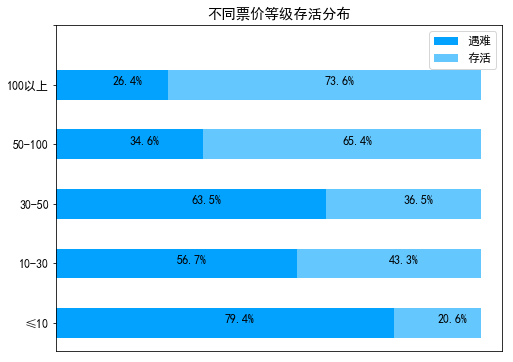

In [45]:
plt.rc('font',family='SimHei',size=12)#正常显示中文，并设置字体大小
fig=plt.figure(figsize=(8,6))#设置画布大小
ax1=fig.add_subplot(1,1,1)#添加子图
y=range(5)
a=fare_prod.loc['遇难',:]
b=fare_prod.loc['存活',:]
ax1.barh(y,a,label='遇难',height=0.5,color='#03A2FF')
ax1.barh(y,b,left=a,label='存活',height=0.5,color='#64C8FF')#通过left参数绘制堆积柱状图
ax1.set_yticks(range(6))#设置y轴刻度，之所以设置为6，是为了让图例显示在空白处
ax1.set_yticklabels(['≤10','10-30','30-50','50-100','100以上'])#设置y轴刻度标签名称
ax1.set_xticks([])#将x轴刻度设置为空
ax1.legend(['遇难','存活'],loc='upper right')#设置图例名称及位置（upper/center/lower,left/center/right）
ax1.set_title('不同票价等级存活分布')#设置标题
#添加数据标签
for x,y,z in zip(range(5),a,b):
    ax1.text(y/2,x,'{:.1%}'.format(y))
    ax1.text(y+z/2,x,'{:.1%}'.format(z))

可以看到，票价在50元以上的，存活率超过65%，这与前面一等舱的存活率高是一致的，我们进一步看下各个仓位等级的平均票价，下面代码结果显示一等舱的票均价为84元

In [48]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

## 登船港口
S: Southampton; C: Cherbourg Q: Queenstown

In [52]:
embarked_df=df.loc[:,['Survived','Embarked']]
embarked_df=embarked_df.groupby(['Survived','Embarked']).size()
embarked_df

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
dtype: int64

In [53]:
embarked_df=embarked_df.unstack()
embarked_df=embarked_df.rename(index={0:'遇难',1:'存活'})
embarked_df

Embarked,C,Q,S
Survived,,,
遇难,75,47,427
存活,93,30,217


In [54]:
embarked_prod=embarked_df/embarked_df.sum()
embarked_prod

Embarked,C,Q,S
Survived,,,
遇难,0.446429,0.61039,0.663043
存活,0.553571,0.38961,0.336957


([<matplotlib.patches.Wedge at 0xeac46d8>,
 [Text(-1.08446,0.184257,'遇难'), Text(1.08446,-0.184257,'存活')],
 [Text(-0.591523,0.100504,'44.6%'), Text(0.591523,-0.100504,'55.4%')])

Text(0.5,1,'Cherbourg港口存活占比')

(-1.1272052501645096,
 1.1120251949076299,
 -1.1099178051888414,
 1.1004722764375638)

([<matplotlib.patches.Wedge at 0xeac9630>,
 [Text(-1.03451,-0.373878,'遇难'), Text(1.03451,0.373878,'存活')],
 [Text(-0.564279,-0.203934,'61.0%'), Text(0.564279,0.203933,'39.0%')])

Text(0.5,1,'Queenstown港口存活占比')

(-1.1140181109982368,
 1.1204911018022419,
 -1.1118403467587432,
 1.1005638260361306)

([<matplotlib.patches.Wedge at 0xeacf630>,
 [Text(-0.958826,-0.539121,'遇难'), Text(0.958826,0.539121,'存活')],
 [Text(-0.522996,-0.294066,'66.3%'), Text(0.522996,0.294066,'33.7%')])

Text(0.5,1,'Southampton港口存活占比')

(-1.1016706150587523,
 1.1031007692760884,
 -1.1029762098098213,
 1.1001417590876974)

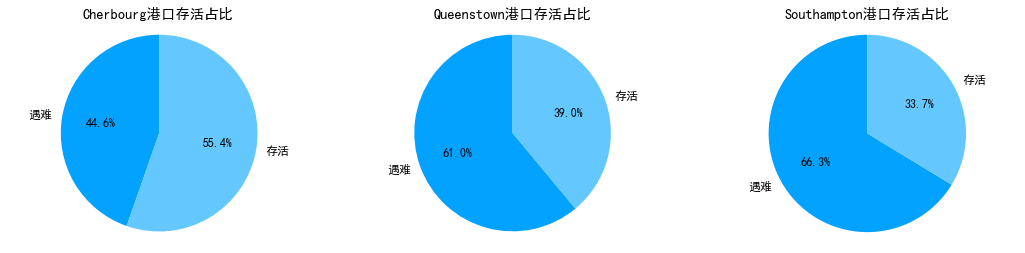

In [66]:
plt.rc('font',family='SimHei',size=12)#正常显示中文，并设置字体大小
fig=plt.figure(figsize=(18,4))
ax1=fig.add_subplot(1,3,1)#图形布局为1行3列，这是第一个图
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
labels=['遇难','存活']
colors=['#03A2FF','#64C8FF']
#Cherbourg港口存活占比
ax1.pie(embarked_prod['C'],labels=labels,colors=colors,startangle=90,autopct='%1.1f%%')
ax1.set_title('Cherbourg港口存活占比')
ax1.axis('equal')#设置x轴,y轴刻度一致，这样饼图才是圆的

#Queenstown港口存活占比
ax2.pie(embarked_prod['Q'],labels=labels,colors=colors,startangle=90,autopct='%1.1f%%')
ax2.set_title('Queenstown港口存活占比')
ax2.axis('equal')

#Southampton港口存活占比
ax3.pie(embarked_prod['S'],labels=labels,colors=colors,startangle=90,autopct='%1.1f%%')
ax3.set_title('Southampton港口存活占比')
ax3.axis('equal')

可以看到，Cherbourg港口的存活比例是最高的，超55%的人员存活下来了

## Name(乘客姓名)
我们先来看一下Name包含的信息

In [68]:
name_df=df.loc[:,['Survived','Name']]
name_df.head()

,Survived,Name
0,0,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,"Allen, Mr. William Henry"


可以看到名字中包含了头衔，如：Mr，Mrs等，我们将头衔从名字信息中提取出来

In [69]:
# 定义函数，用来提取名字字符串中的头衔信息
def get_title(name):
    str1=name.split(',')[1] #按','分割，结果返回列表，提取第二个元素
    str2=str1.split('.')[0] #按'.'分割，结果返回列表，提取第一个元素
    return str2.strip() #移出字符串首尾空格，并返回
name_df['title']=name_df['Name'].apply(get_title)
name_df.head()

,Survived,Name,title
0,0,"Braund, Mr. Owen Harris",Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,1,"Heikkinen, Miss. Laina",Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,0,"Allen, Mr. William Henry",Mr


先简单看下title各个值的数量

In [70]:
name_df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Ms                1
the Countess      1
Sir               1
Lady              1
Mme               1
Don               1
Capt              1
Jonkheer          1
Name: title, dtype: int64

将上述头衔对应到下面的几种类别中:
Officer：政府官员； Royalty：王室（皇室）； Mr：已婚男士； Mrs：已婚妇女； Miss：年轻未婚女子； Master：有技能的人/教师

In [74]:
title_dict={"Capt":"Officer","Col":"Officer","Major":"Officer","Jonkheer":"Royalty","Don":"Royalty","Sir":"Royalty","Dr":"Officer"
            ,"Rev":"Officer","the Countess":"Royalty","Dona":"Royalty","Mme":"Mrs","Mlle":"Miss","Ms":"Mrs","Mr" :"Mr" ,"Mrs" :"Mrs"
            ,"Miss" :"Miss","Master" :"Master", "Lady" : "Royalty"}
name_df['title_catgory']=name_df['title'].map(title_dict)#调用字典时，不可用allpy
name_df.head()

,Survived,Name,title,title_catgory
0,0,"Braund, Mr. Owen Harris",Mr,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Mrs
2,1,"Heikkinen, Miss. Laina",Miss,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Mrs
4,0,"Allen, Mr. William Henry",Mr,Mr


In [79]:
# 统计不同头衔的存活率
title_df=name_df.groupby(['Survived','title_catgory']).size().unstack()
title_df=title_df.rename({0:'遇难',1:'存活'})
title_df

title_catgory,Master,Miss,Mr,Mrs,Officer,Royalty
Survived,,,,,,
遇难,17,55,436,26,13,2
存活,23,129,81,101,5,3


In [80]:
title_prod=title_df/title_df.sum()
title_prod

title_catgory,Master,Miss,Mr,Mrs,Officer,Royalty
Survived,,,,,,
遇难,0.425,0.298913,0.843327,0.204724,0.722222,0.4
存活,0.575,0.701087,0.156673,0.795276,0.277778,0.6


<Container object of 6 artists>

<Container object of 6 artists>

[Text(0,0,'Master'),
 Text(0,0,'Miss'),
 Text(0,0,'Mr'),
 Text(0,0,'Mrs'),
 Text(0,0,'Officer'),
 Text(0,0,'Royalty')]

[]

Text(0.5,1,'不同头衔存活分布')

Text(0.2125,-0.1,'42.5%')

Text(0.7125,-0.1,'57.5%')

Text(0.149457,0.9,'29.9%')

Text(0.649457,0.9,'70.1%')

Text(0.421663,1.9,'84.3%')

Text(0.921663,1.9,'15.7%')

Text(0.102362,2.9,'20.5%')

Text(0.602362,2.9,'79.5%')

Text(0.361111,3.9,'72.2%')

Text(0.861111,3.9,'27.8%')

Text(0.2,4.9,'40.0%')

Text(0.7,4.9,'60.0%')

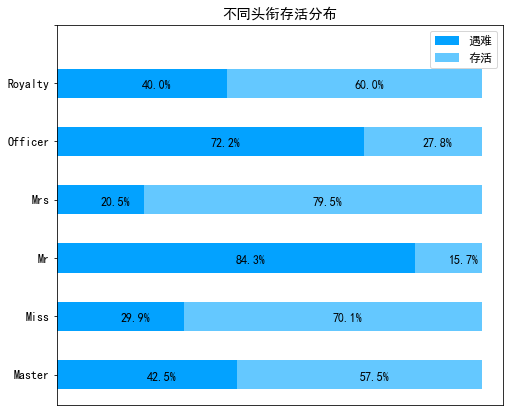

In [90]:
plt.rc('font',family='SimHei',size=12)#正常显示中文，并设置字体大小
fig=plt.figure(figsize=(8,7))#设置画布大小
ax1=fig.add_subplot(1,1,1)#添加子图
y=range(6)
a=title_prod.loc['遇难',:]
b=title_prod.loc['存活',:]
ax1.barh(y,a,label='遇难',height=0.5,color='#03A2FF')
ax1.barh(y,b,left=a,label='存活',height=0.5,color='#64C8FF')#通过left参数绘制堆积柱状图
ax1.set_yticks(range(7))#设置y轴刻度，之所以设置为7，是为了让图例显示在空白处
ax1.set_yticklabels(['Master','Miss','Mr','Mrs','Officer','Royalty'])#设置y轴刻度标签名称
ax1.set_xticks([])#将x轴刻度设置为空
ax1.legend(['遇难','存活'],loc='upper right')#设置图例名称及位置（upper/center/lower,left/center/right）
ax1.set_title('不同头衔存活分布')#设置标题
#添加数据标签
for x,y,z in zip(range(6),a,b):
    ax1.text(y/2,x-0.1,'{:.1%}'.format(y))
    ax1.text(y+z/2,x-0.1,'{:.1%}'.format(z))

可以看到，已婚女士（Mrs）和未婚女士（Miss）的存活率最高